In [12]:
#import lib
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os

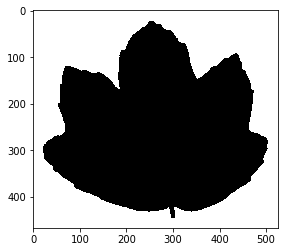

In [4]:
#for testing purpose imorting only one image

img_array = cv2.imread('images/1.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap = plt.cm.binary)

In [6]:
img_array.shape

(467, 526)

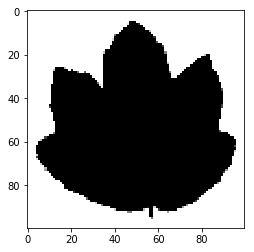

In [9]:
new_img = cv2.resize(img_array, (100,100))
plt.imshow(new_img, cmap = plt.cm.binary)

In [14]:
#now importing all the images
image_list = []

for filename in os.listdir("images"):
    img_a = cv2.imread(os.path.join("images", filename))
    new_img = cv2.resize(img_a, (100, 100))
    image_list.append(new_img)

In [18]:
image_list[0].shape

(100, 100, 3)

In [48]:
#In folder only first 990 are for training 

X = image_list[:990 ]
test = image_list[990:1584 ]

In [49]:
#importing labels for species
labels = pd.read_csv('train.csv').pop('species')

In [50]:
len(labels)
len(image_list[990:1584 ])

594

In [51]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder().fit(labels)
labels = enc.transform(labels)

In [52]:
len(X)

990

In [53]:
#normalizing data
X = keras.utils.normalize(X)
test = keras.utils.normalize(test)


In [54]:
model = keras.models.Sequential()

In [55]:
model.add(keras.layers.Flatten())

In [56]:
model.add(keras.layers.Dense(256, activation = tf.nn.relu))

In [57]:
model.add(keras.layers.Dense(256, activation = tf.nn.relu))

In [58]:
model.add(keras.layers.Dense(99, activation = tf.nn.softmax))

In [59]:
model.compile( optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [60]:
model.fit(X, labels, epochs = 5)

Epoch 1/5
990/990 [==============================] - 8s 8ms/step - loss: 6.3450 - acc: 0.0091
Epoch 2/5
990/990 [==============================] - 7s 7ms/step - loss: 4.6145 - acc: 0.0071
Epoch 3/5
990/990 [==============================] - 7s 7ms/step - loss: 4.5951 - acc: 0.0061
Epoch 4/5
990/990 [==============================] - 6s 6ms/step - loss: 4.5911 - acc: 0.0121
Epoch 5/5
990/990 [==============================] - 7s 7ms/step - loss: 4.5807 - acc: 0.0121


In [61]:
predictions = model.predict_proba(test)

In [62]:
#importing test id's
test_id = pd.read_csv('test.csv').pop('id')
print(len(test_id))
print(len(predictions))
print(len(test))

594
594
594


In [63]:
result = pd.DataFrame(predictions, index =test_id, columns = enc.classes_ ) 

In [64]:
result.to_csv('Result_img.csv')